In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3741446666.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.
First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets] scikit-learn seaborn matplotlib imbalanced-learn

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1) Chargement via kagglehub
file_path = "creditcard.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    file_path,
)

print("Shape:", df.shape)
print(df.head())
print(df["Class"].value_counts(normalize=True))


/tmp/ipython-input-1400210360.py:28: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.
Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  

In [7]:
# Vérifier les doublons
print("Nombre de doublons avant:", df.duplicated().sum())
df = df.drop_duplicates()
print("Nombre de doublons après:", df.duplicated().sum())
print("Nouvelle shape:", df.shape)

# Vérification des types
print(df.dtypes)


Nombre de doublons avant: 1081
Nombre de doublons après: 0
Nouvelle shape: (283726, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [8]:
# Vérification des valeurs manquantes
missing = df.isna().sum()
print(missing[missing > 0])

# S'il n'y a pas de NA, mentionner dans le rapport qu'aucune imputation n'a été nécessaire.
# Exemple de stratégie avancée si tu ajoutes un dataset avec des NaN:
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer()
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


Series([], dtype: int64)


In [9]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [10]:
# Exemple : création d'une variable 'HighAmount' binaire
amount_threshold = X["Amount"].quantile(0.95)
X["HighAmount"] = (X["Amount"] > amount_threshold).astype(int)

# Exemple : catégorisation du temps (jour/nuit) si tu le souhaites
# Ici, Time est en secondes depuis la première transaction
X["Time_hours"] = X["Time"] / 3600
X["IsNight"] = ((X["Time_hours"] % 24 < 6) | (X["Time_hours"] % 24 > 22)).astype(int)


In [11]:
numeric_features = X.columns  # ici tout est numérique, tu peux restreindre si tu veux

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)


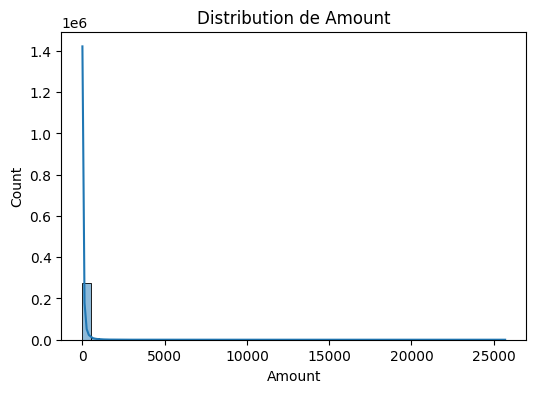

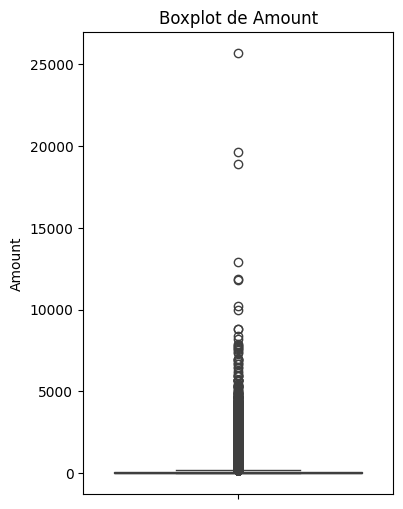

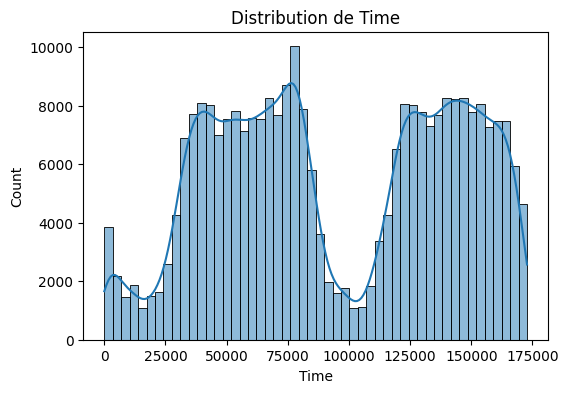

In [12]:
# Distribution de Amount
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution de Amount")
plt.show()

# Commentaire à écrire dans le rapport:
# - parler de la forte asymétrie, des nombreux petits montants, etc.

# Boxplot pour Amount
plt.figure(figsize=(4,6))
sns.boxplot(y=df["Amount"])
plt.title("Boxplot de Amount")
plt.show()

# Distribution de Time
plt.figure(figsize=(6,4))
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Distribution de Time")
plt.show()


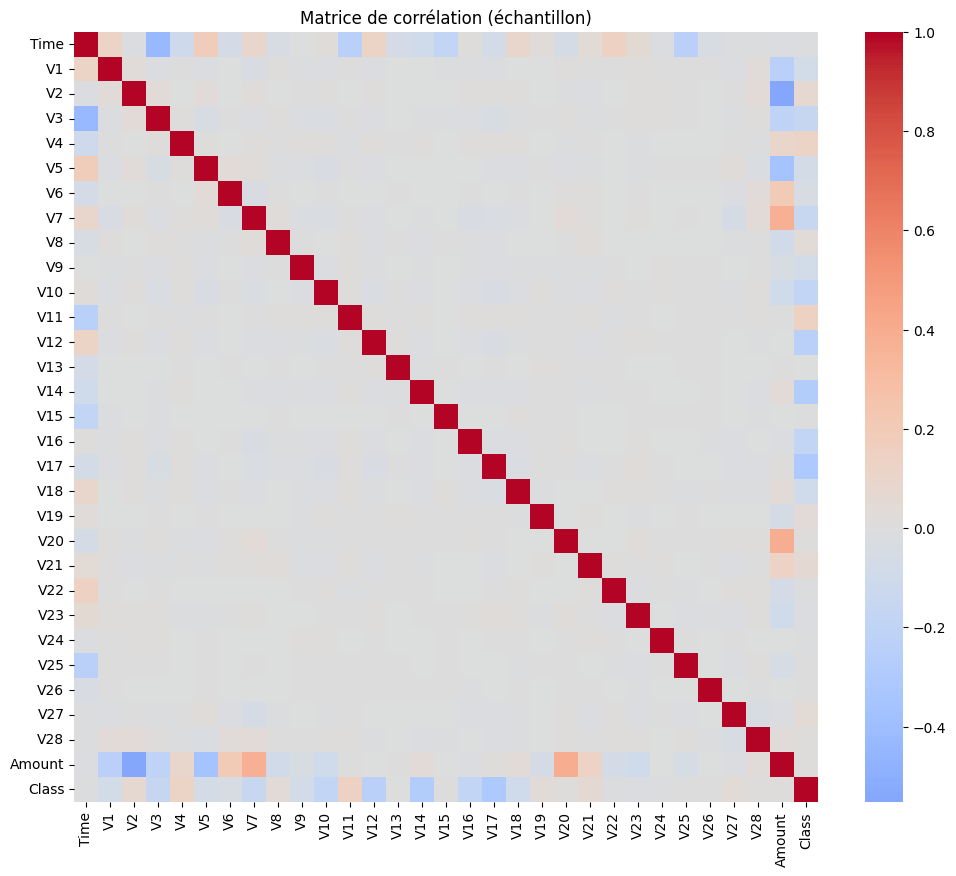

In [13]:
# Pour alléger le calcul, on peut prendre un échantillon
sample_df = df.sample(frac=0.2, random_state=42)

plt.figure(figsize=(12,10))
corr = sample_df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (échantillon)")
plt.show()

# Dans le rapport, commenter les variables les plus corrélées entre elles
# et la corrélation (même faible) avec la variable cible 'Class'.


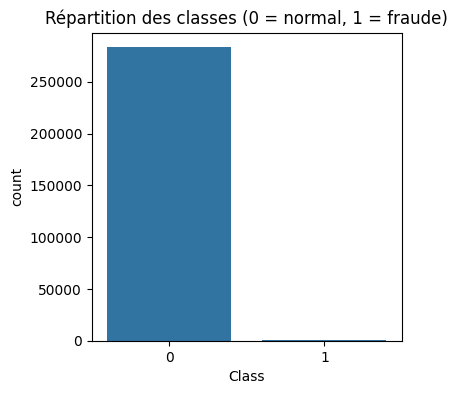

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x="Class", data=df)
plt.title("Répartition des classes (0 = normal, 1 = fraude)")
plt.show()

print(df["Class"].value_counts(normalize=True))
# Commenter le fort déséquilibre.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [18]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1) Logistic Regression
log_reg = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(max_iter=1000, class_weight=None))
])

In [19]:
# 2) Random Forest
rf = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(random_state=42))
])

In [20]:
# 3) Gradient Boosting
gb = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", GradientBoostingClassifier(random_state=42))
])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest (already present in the kernel state as param_grid_rf)
# param_grid_rf = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [None, 10, 20],
#     'clf__min_samples_split': [2, 5]
# }

# Perform Grid Search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print('Best parameters for Random Forest:', grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Classification report (test):")
print(classification_report(y_test, y_pred, digits=4))

print("AUC-ROC (test):", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest optimisé")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Courbe ROC - Random Forest optimisé")
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
